# Problem Statement

In [35]:
#import all modules
import numpy as np
import matplotlib.pyplot as plt
from math import pow, factorial
from operator import mul

# Poisson random variable

A Poisson random variable models the number of events occurring in a fixed interval of time or space, given a constant average rate of occurrence.

The probability of observing exactly k events in the interval is given by:

$P(X = k) = \frac{e^{-\lambda} \cdot {\lambda^k}}{k!}$

**Where:**

- $P(X = k):$ Probability of k events occurring in the interval
- $λ:$ Average rate of occurrence of events
- $e:$ Euler's number (approximately 2.71828)


**Example:**

Suppose the average number of customers arriving at a store per hour is `5`. The probability of exactly 3 customers arriving in an hour can be calculated using the Poisson PMF:

$P(X = 3) = (e^{-5} · 5^{3}) / {3!}$

In [36]:
# poisson distribution
def poisson_pmf(Lambda, no_of_events):
    '''
    Arguments :
        Lambda(float, >0): the value of lambda
        no_of_events(int, 0 to inf): no of the events
    returns :
        probability(float, 0 to 1): probability of no_of_events occuring 
    '''
    probability = np.exp(-Lambda) * pow(Lambda, no_of_events) / factorial(no_of_events+1)

    return probability

In [37]:
# Parameters
Lambda = 3  # Average rate of events
vals = range(0, 41)

# Calculate probabilities
probs = [poisson_pmf(Lambda, no_of_events) for no_of_events in vals]
for val, prob in zip(vals, probs):
    print(f"P(X={val}) = {prob}, the probability of {val+1} event(s) happening out of {len(vals)} events when the mean of the events happening is {Lambda}")

P(X=0) = 0.049787068367863944, the probability of 1 event(s) happening out of 41 events when the mean of the events happening is 3
P(X=1) = 0.07468060255179591, the probability of 2 event(s) happening out of 41 events when the mean of the events happening is 3
P(X=2) = 0.07468060255179591, the probability of 3 event(s) happening out of 41 events when the mean of the events happening is 3
P(X=3) = 0.05601045191384694, the probability of 4 event(s) happening out of 41 events when the mean of the events happening is 3
P(X=4) = 0.033606271148308164, the probability of 5 event(s) happening out of 41 events when the mean of the events happening is 3
P(X=5) = 0.016803135574154082, the probability of 6 event(s) happening out of 41 events when the mean of the events happening is 3
P(X=6) = 0.0072013438174946065, the probability of 7 event(s) happening out of 41 events when the mean of the events happening is 3
P(X=7) = 0.0027005039315604776, the probability of 8 event(s) happening out of 41 eve

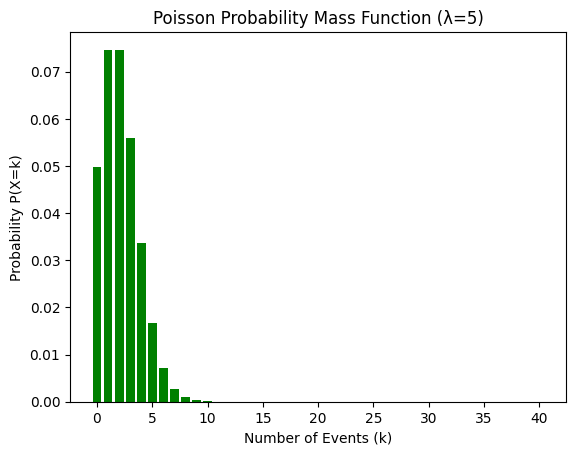

In [38]:
# Plot the PMF
plt.bar(vals, probs, color='green')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability P(X=k)')
plt.title('Poisson Probability Mass Function (λ=5)')
plt.show()